# Bank Loan Approval Prediction
### Group Number  : 98
* EG/2020/3981 - Jayarathne G.U.T.N.C.
* EG/2020/3986 - Jayasinghe D.M.S.N.

### Data Source: https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc/

## Initializing the Data Set

### Import the Libraries

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [119]:
data = pd.read_csv("bankloan.csv") # Import the data set

In [120]:
data.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Analizing Data

In [121]:
data.shape

(5000, 14)

In [122]:
data.describe().T # Generating an overview of descriptive statistics

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP.Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal.Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [123]:
data.info() # Prints a summary of the 'data' DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Data Preprocessing 

### Missing Values

In [124]:
data.isnull().sum() # Counts the number of missing values in each column of the 'data' DataFrame

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

### Duplicate Values

In [125]:
data.duplicated().sum() # Counts the number of duplicate rows in the 'data' DataFrame

0

### Selecting Features

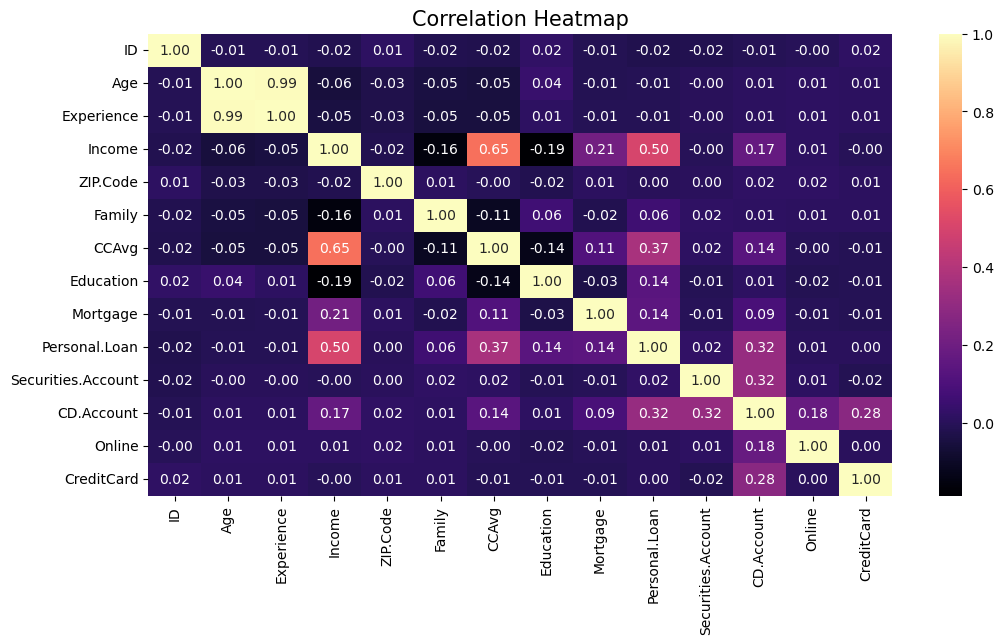

In [126]:
plt.figure(figsize = (12,6))
# Creates a heatmap of the correlation matrix of the 'data' DataFrame, with annotations and a 'magma' color map
sns.heatmap(data.corr(), annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Heatmap',fontsize=15)
plt.show()

### Correlation of Features

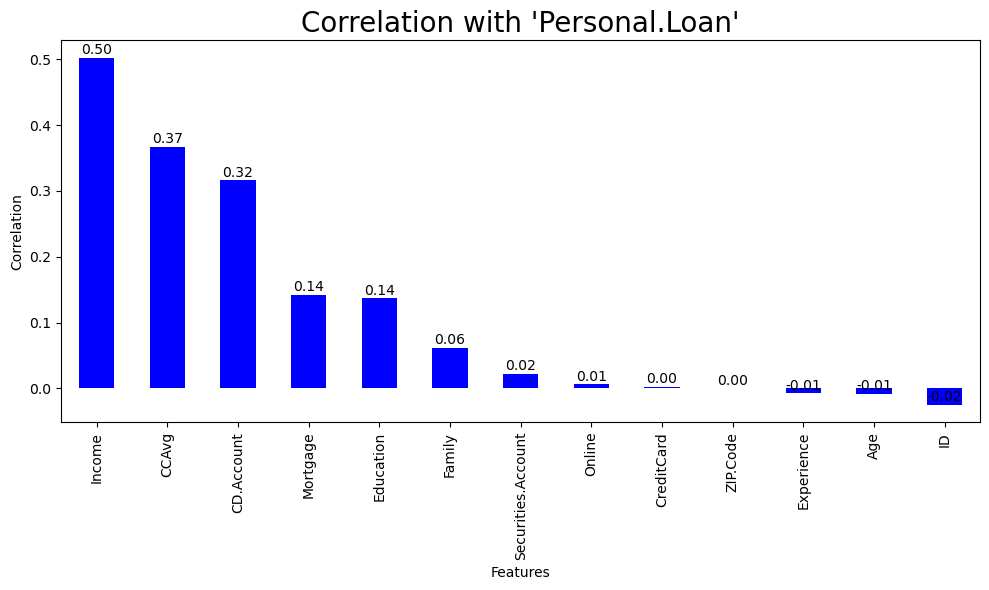

In [127]:
# Calculates the correlation of 'Personal.Loan' with other columns, drops the self-correlation, and sorts the correlations
correlations = data.corr()['Personal.Loan'].drop('Personal.Loan')
sorted_correlations = correlations.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sorted_correlations.plot(kind='bar', color='blue')
plt.title("Correlation with 'Personal.Loan'",fontsize=20)
plt.xlabel('Features')
plt.ylabel('Correlation')

for i, v in enumerate(sorted_correlations):
    ax.text(i, v + 0.001, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

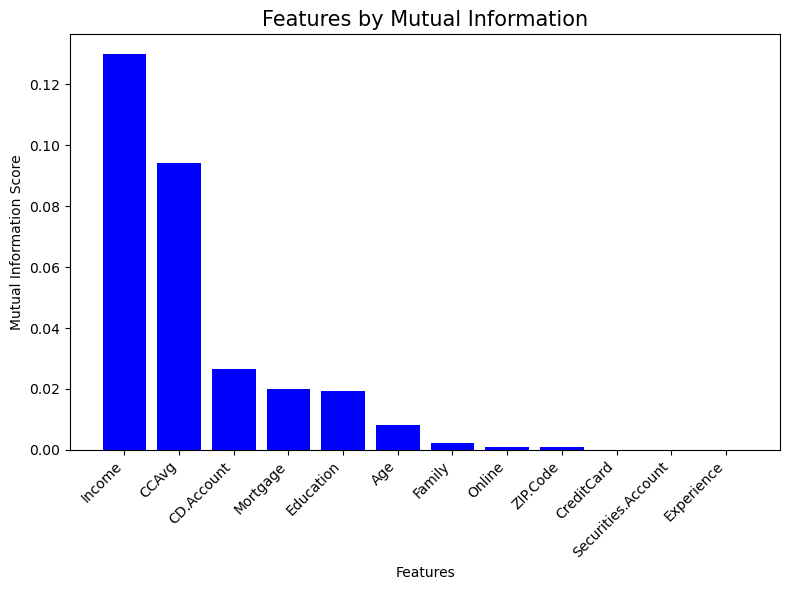

In [130]:
p=data.drop(['ID','Personal.Loan'],axis=1)
q=data['Personal.Loan']

from sklearn.feature_selection import mutual_info_classif

mutual_info_scores = mutual_info_classif(p, q,random_state=1)

top_indices = np.argsort(mutual_info_scores)[::-1]


plt.figure(figsize=(8, 6))
plt.bar(p.columns[top_indices], mutual_info_scores[top_indices], color='blue')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Features by Mutual Information', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Outliers

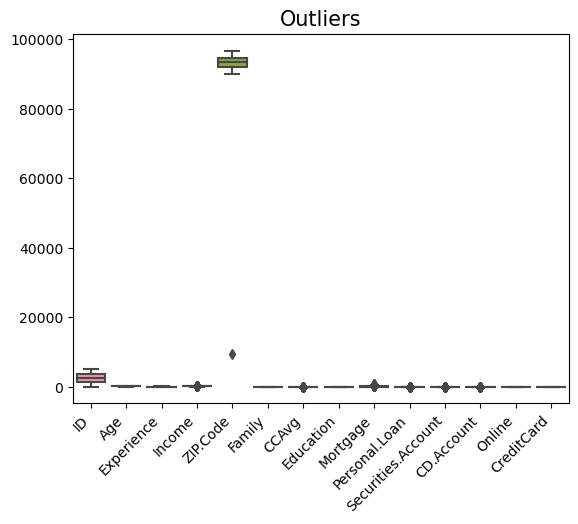

In [131]:
sns.boxplot(data) # Creates a box plot of the 'data' DataFrame
plt.xticks(rotation=45, ha="right")
plt.title('Outliers',fontsize=15)
plt.show()

In [132]:
# Replaces all periods in the column names of the 'data' DataFrame with underscores
data.columns = [col.replace('.', '_') for col in data.columns]
data.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Model Creation

In [133]:
data = data.drop(['ID','ZIP_Code','Online','CreditCard','Experience'],axis=1)

In [134]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account
0,25,49,4,1.6,1,0,0,1,0
1,45,34,3,1.5,1,0,0,1,0
2,39,11,1,1.0,1,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0


In [19]:
y = data['Personal_Loan'] # Assigns the 'Personal_Loan' column of the 'data' DataFrame to 'y'
x = data.drop('Personal_Loan',axis = 1) # Drops the 'Personal_Loan' column from the 'data' DataFrame and assigns the result to 'x'

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state =42)

In [21]:
# Creates a pipeline for logistic regression that first scales the data and then applies the logistic regression model
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Creates a pipeline for decision tree that first scales the data and then applies the decision tree model
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

### Training

In [135]:
# Fits the logistic regression pipeline to the training data
pipeline_lr.fit(x_train, y_train)

# Fits the decision tree pipeline to the training data
pipeline_dt.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier())])

### Make Predictions

In [23]:
# Uses the logistic regression pipeline to make predictions on the test data
y_pred_lr = pipeline_lr.predict(x_test)

# Uses the decision tree pipeline to make predictions on the test data
y_pred_dt = pipeline_dt.predict(x_test)

## Evaluate the Model Perfomance

### Accuarcy

In [112]:
# Calculates the accuracy score of the logistic regression model on the test data
score_lr = accuracy_score(y_test, y_pred_lr)

# Calculates the accuracy score of the decision tree model on the test data
score_dt = accuracy_score(y_test, y_pred_dt)

In [113]:
print('Logistic Regression Accuracy = ',score_lr)
print('Decision Tree Accuracy = ',score_dt)

Logistic Regression Accuracy =  0.95
Decision Tree Accuracy =  0.983


### Confusion Matrix

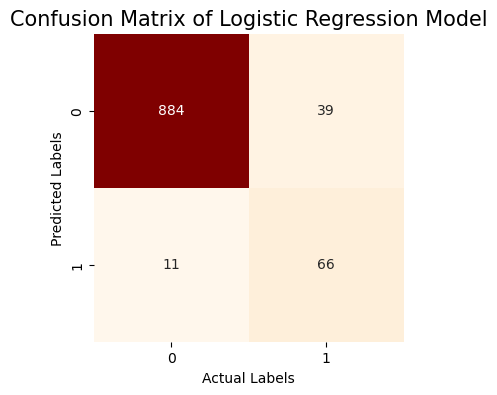

In [114]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Create a new figure with a specific size
plt.figure(figsize=(4, 4))

sns.heatmap(cm.T, annot=True, fmt='d', cmap='OrRd', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

# Set the title of the plot
plt.title('Confusion Matrix of Logistic Regression Model', fontsize=15)

# Set the labels for the x and y axes
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

# Display the plot
plt.show()

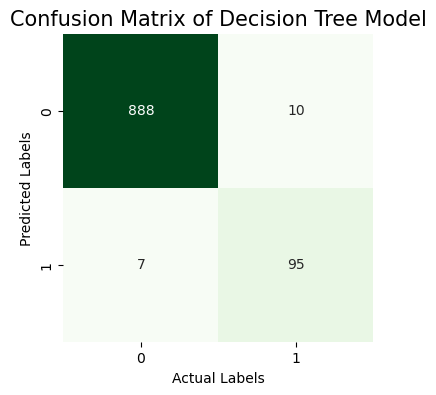

In [115]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Create a new figure with a specific size
plt.figure(figsize=(4, 4))

sns.heatmap(cm.T, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

# Set the title of the plot
plt.title('Confusion Matrix of Decision Tree Model', fontsize=15)

# Set the labels for the x and y axes
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

# Display the plot
plt.show()

### Classification Report

In [116]:
# Create classification report for the logistic regression model
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

# Create classification report for the decision tree model
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# Convert the reports to DataFrames for easier visualization
df_lr = pd.DataFrame(report_lr).transpose()
df_dt = pd.DataFrame(report_dt).transpose()

# Display the reports
print("Logistic Regression:\n", df_lr)
print("\nDecision Tree:\n", df_dt)

Logistic Regression:
               precision    recall  f1-score  support
0              0.957746  0.987709  0.972497   895.00
1              0.857143  0.628571  0.725275   105.00
accuracy       0.950000  0.950000  0.950000     0.95
macro avg      0.907445  0.808140  0.848886  1000.00
weighted avg   0.947183  0.950000  0.946539  1000.00

Decision Tree:
               precision    recall  f1-score   support
0              0.988864  0.992179  0.990519   895.000
1              0.931373  0.904762  0.917874   105.000
accuracy       0.983000  0.983000  0.983000     0.983
macro avg      0.960118  0.948470  0.954197  1000.000
weighted avg   0.982828  0.983000  0.982891  1000.000
